## Objective
* Load data and separate your columns
* Plot these columns and summarize
* Impute the NULL/NA values, if exists

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
dataframe = pd.read_csv('/content/train.csv')

## separate your columns and drop 'SalePrice'
dataframe = dataframe.loc[:,'Foundation':]
## dataframe = dataframe.drop(columns=['SalePrice'])

In [3]:
## Separate categorical and numerical columns
catColumns = [col for col in dataframe.columns if dataframe[col].dtype == 'object']
numColumns = [col for col in dataframe.columns if dataframe[col].dtype != 'object']

In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 52 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Foundation     1460 non-null   object 
 1   BsmtQual       1423 non-null   object 
 2   BsmtCond       1423 non-null   object 
 3   BsmtExposure   1422 non-null   object 
 4   BsmtFinType1   1423 non-null   object 
 5   BsmtFinSF1     1460 non-null   int64  
 6   BsmtFinType2   1422 non-null   object 
 7   BsmtFinSF2     1460 non-null   int64  
 8   BsmtUnfSF      1460 non-null   int64  
 9   TotalBsmtSF    1460 non-null   int64  
 10  Heating        1460 non-null   object 
 11  HeatingQC      1460 non-null   object 
 12  CentralAir     1460 non-null   object 
 13  Electrical     1459 non-null   object 
 14  1stFlrSF       1460 non-null   int64  
 15  2ndFlrSF       1460 non-null   int64  
 16  LowQualFinSF   1460 non-null   int64  
 17  GrLivArea      1460 non-null   int64  
 18  BsmtFull

## Handling NULL values
* BsmtQual
* BsmtCond
* BsmtFinType1
* BsmtFinType2 <-- **fill NA inplace of NaN**
* BsmtExposure is NaN but bsmt exists (1 row)
* BsmtFinSF1 and BsmtFinSF2 is 0 iff no basement or is unfinished.
* unfinished basement area <-- BsmtUnfSF
* TotalBsmtSF = BsmtFinSF1 + BsmtFinSF2 + BsmtUnfSF
* BsmtFinType2 is NaN but BsmtFinSF2 > 0 (1 row)
* Electrical is NaN (1 row)
* LowQualFinSF < 1stFlrSF + 2ndFlrSF
* if Fireplace = 0 then FireplaceQual = NA (690 rows)
* GarageType
* GarageYrBuilt
* GarageFinish
* GarageQual
* GarageCond <-- **fill NA inplace of NaN**
* If GarageArea = 0 then GarageCars = 0
* For no pools, PoolQual = NA
* Fence = NA
* MiscFeatures = NA
* MiscVal is 0 for missing features

In [5]:
dataframe.loc[dataframe.index[(dataframe.loc[:,'MiscVal'] == 0) & (dataframe.loc[:,'MiscFeature'].isna() == False)],'MiscFeature':'MiscVal']

,MiscFeature,MiscVal
873,Othr,0
1200,Shed,0


## Categorical columns
* Plot categorical features
* Plot wrt *SalePrice*
* Figure out any correlations

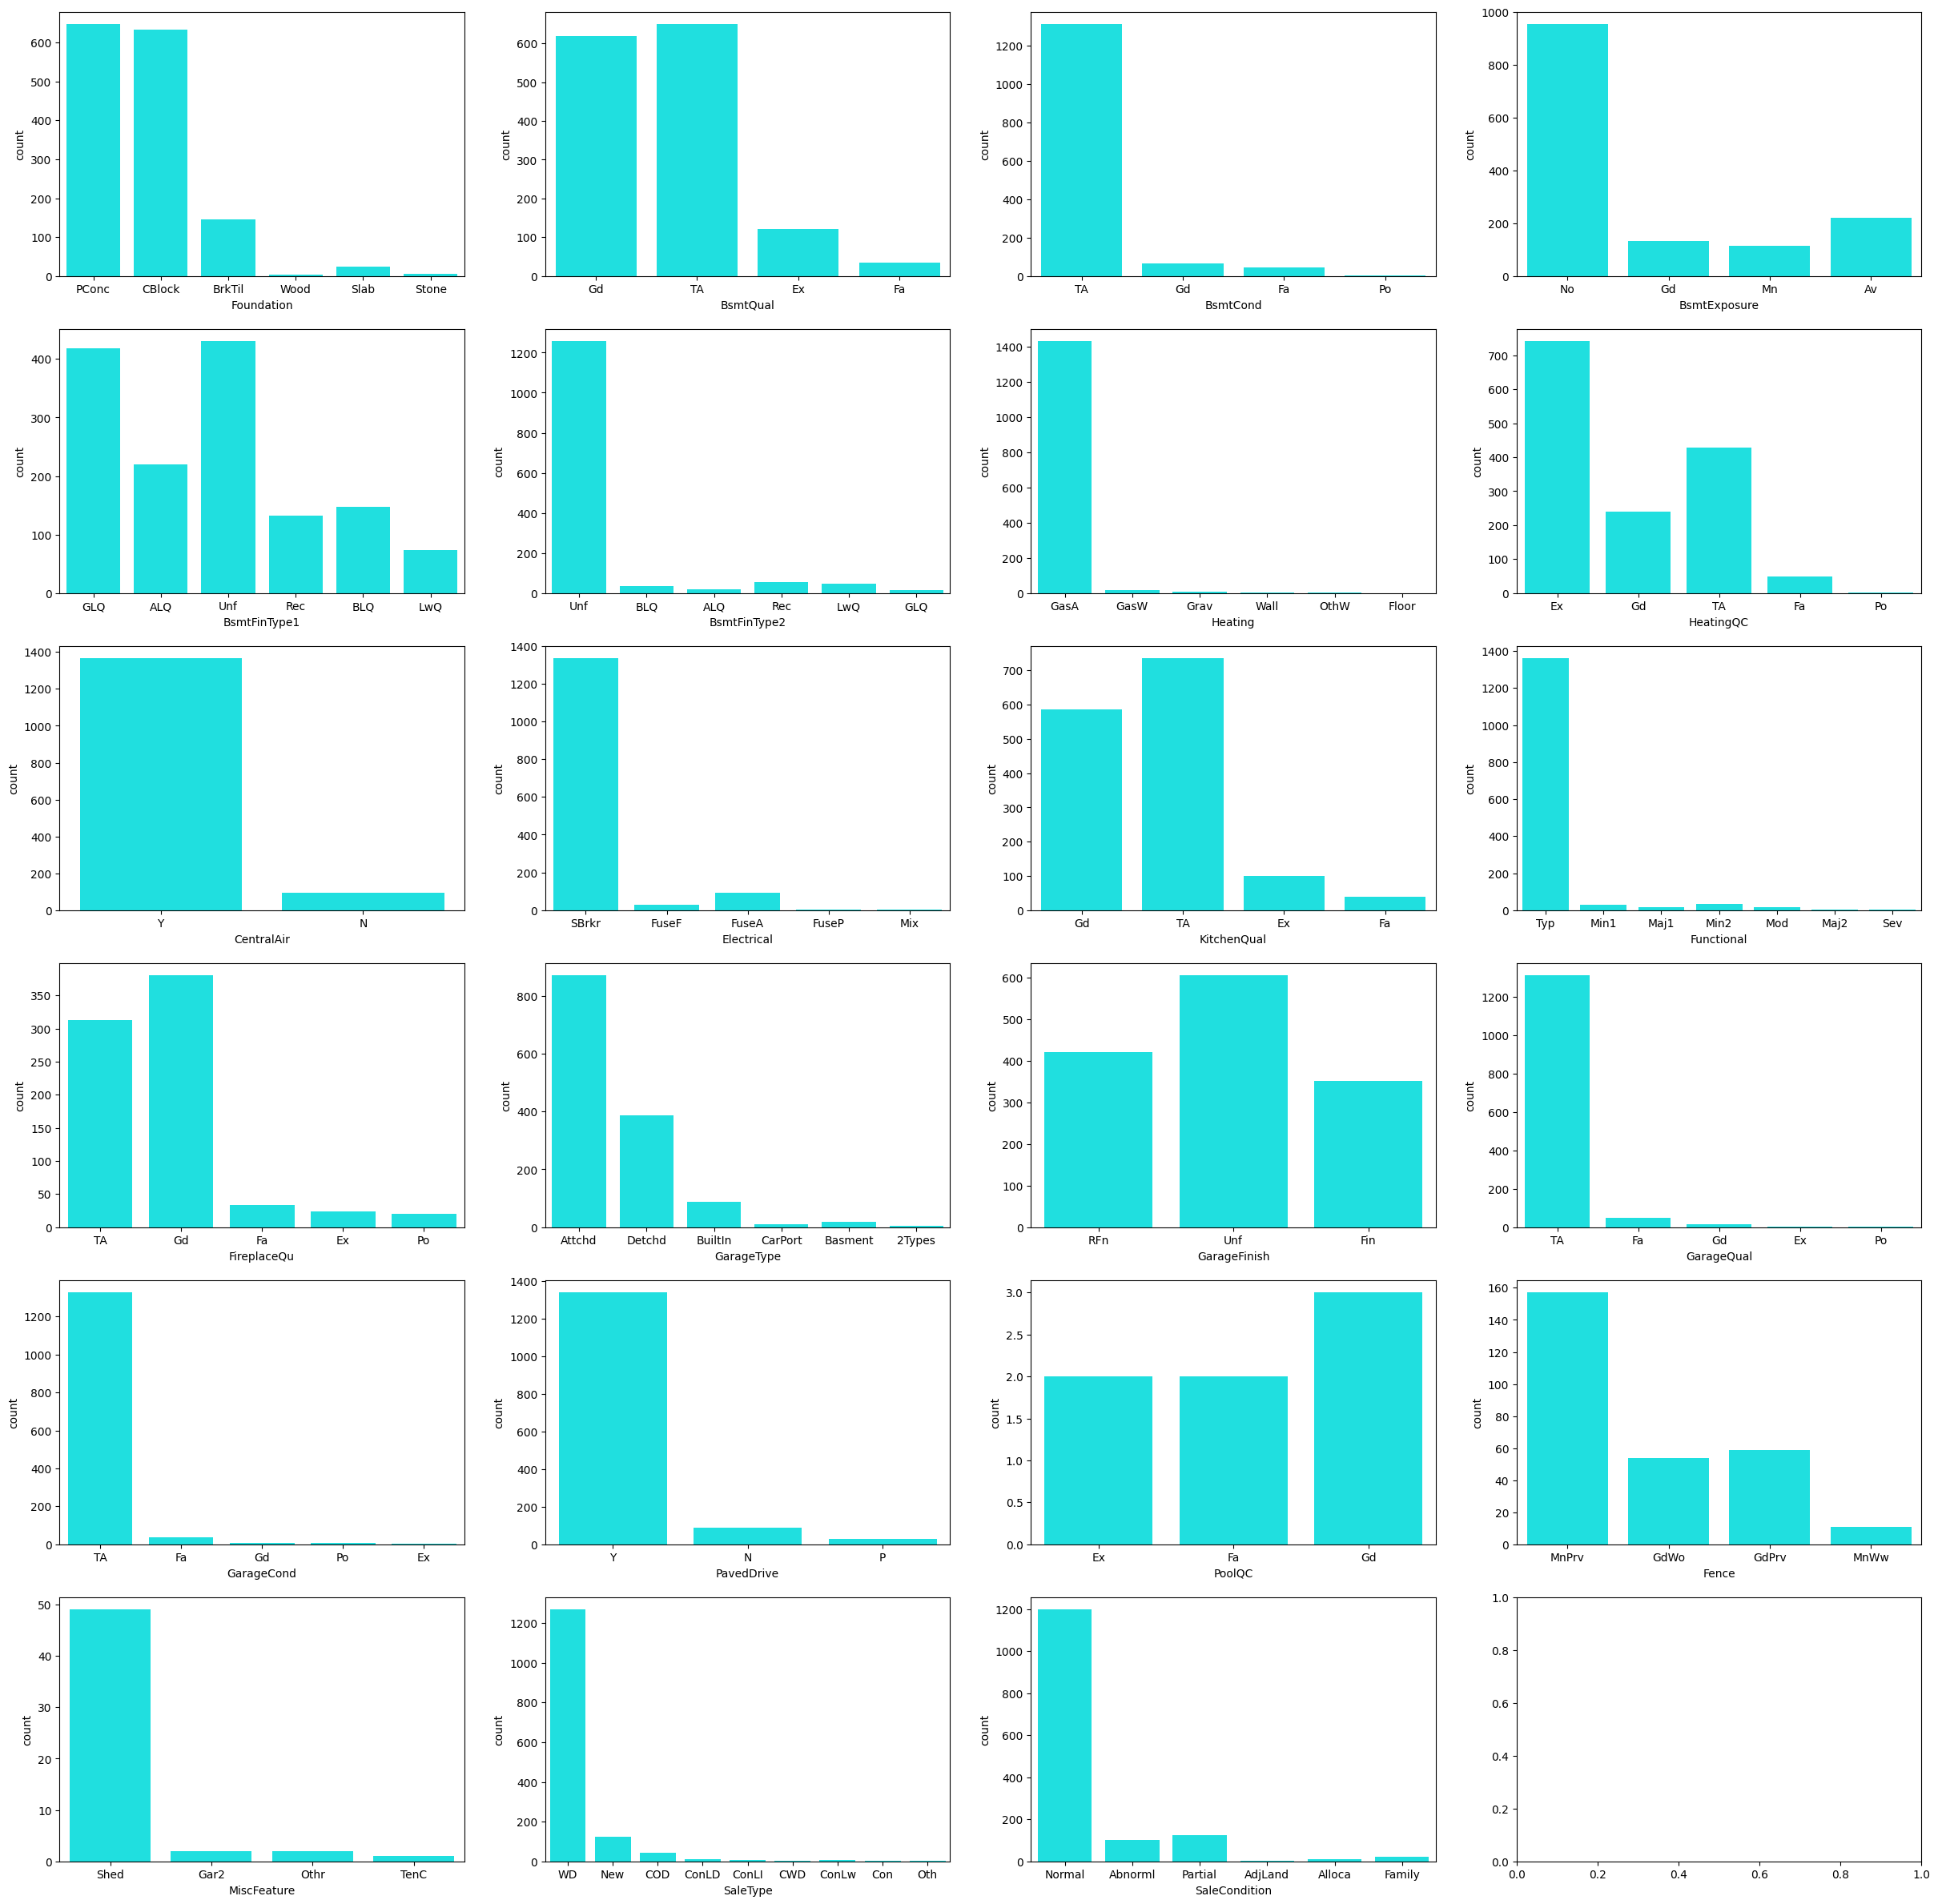

In [6]:
fig, axes = plt.subplots(6,4,figsize=(30,30))

k = 0
for i in range(6):
    for j in range(4):
        if k >= len(catColumns):
            break
        sns.countplot(data=dataframe,x=catColumns[k],color='cyan',stat='count',ax=axes[i,j])
        k += 1

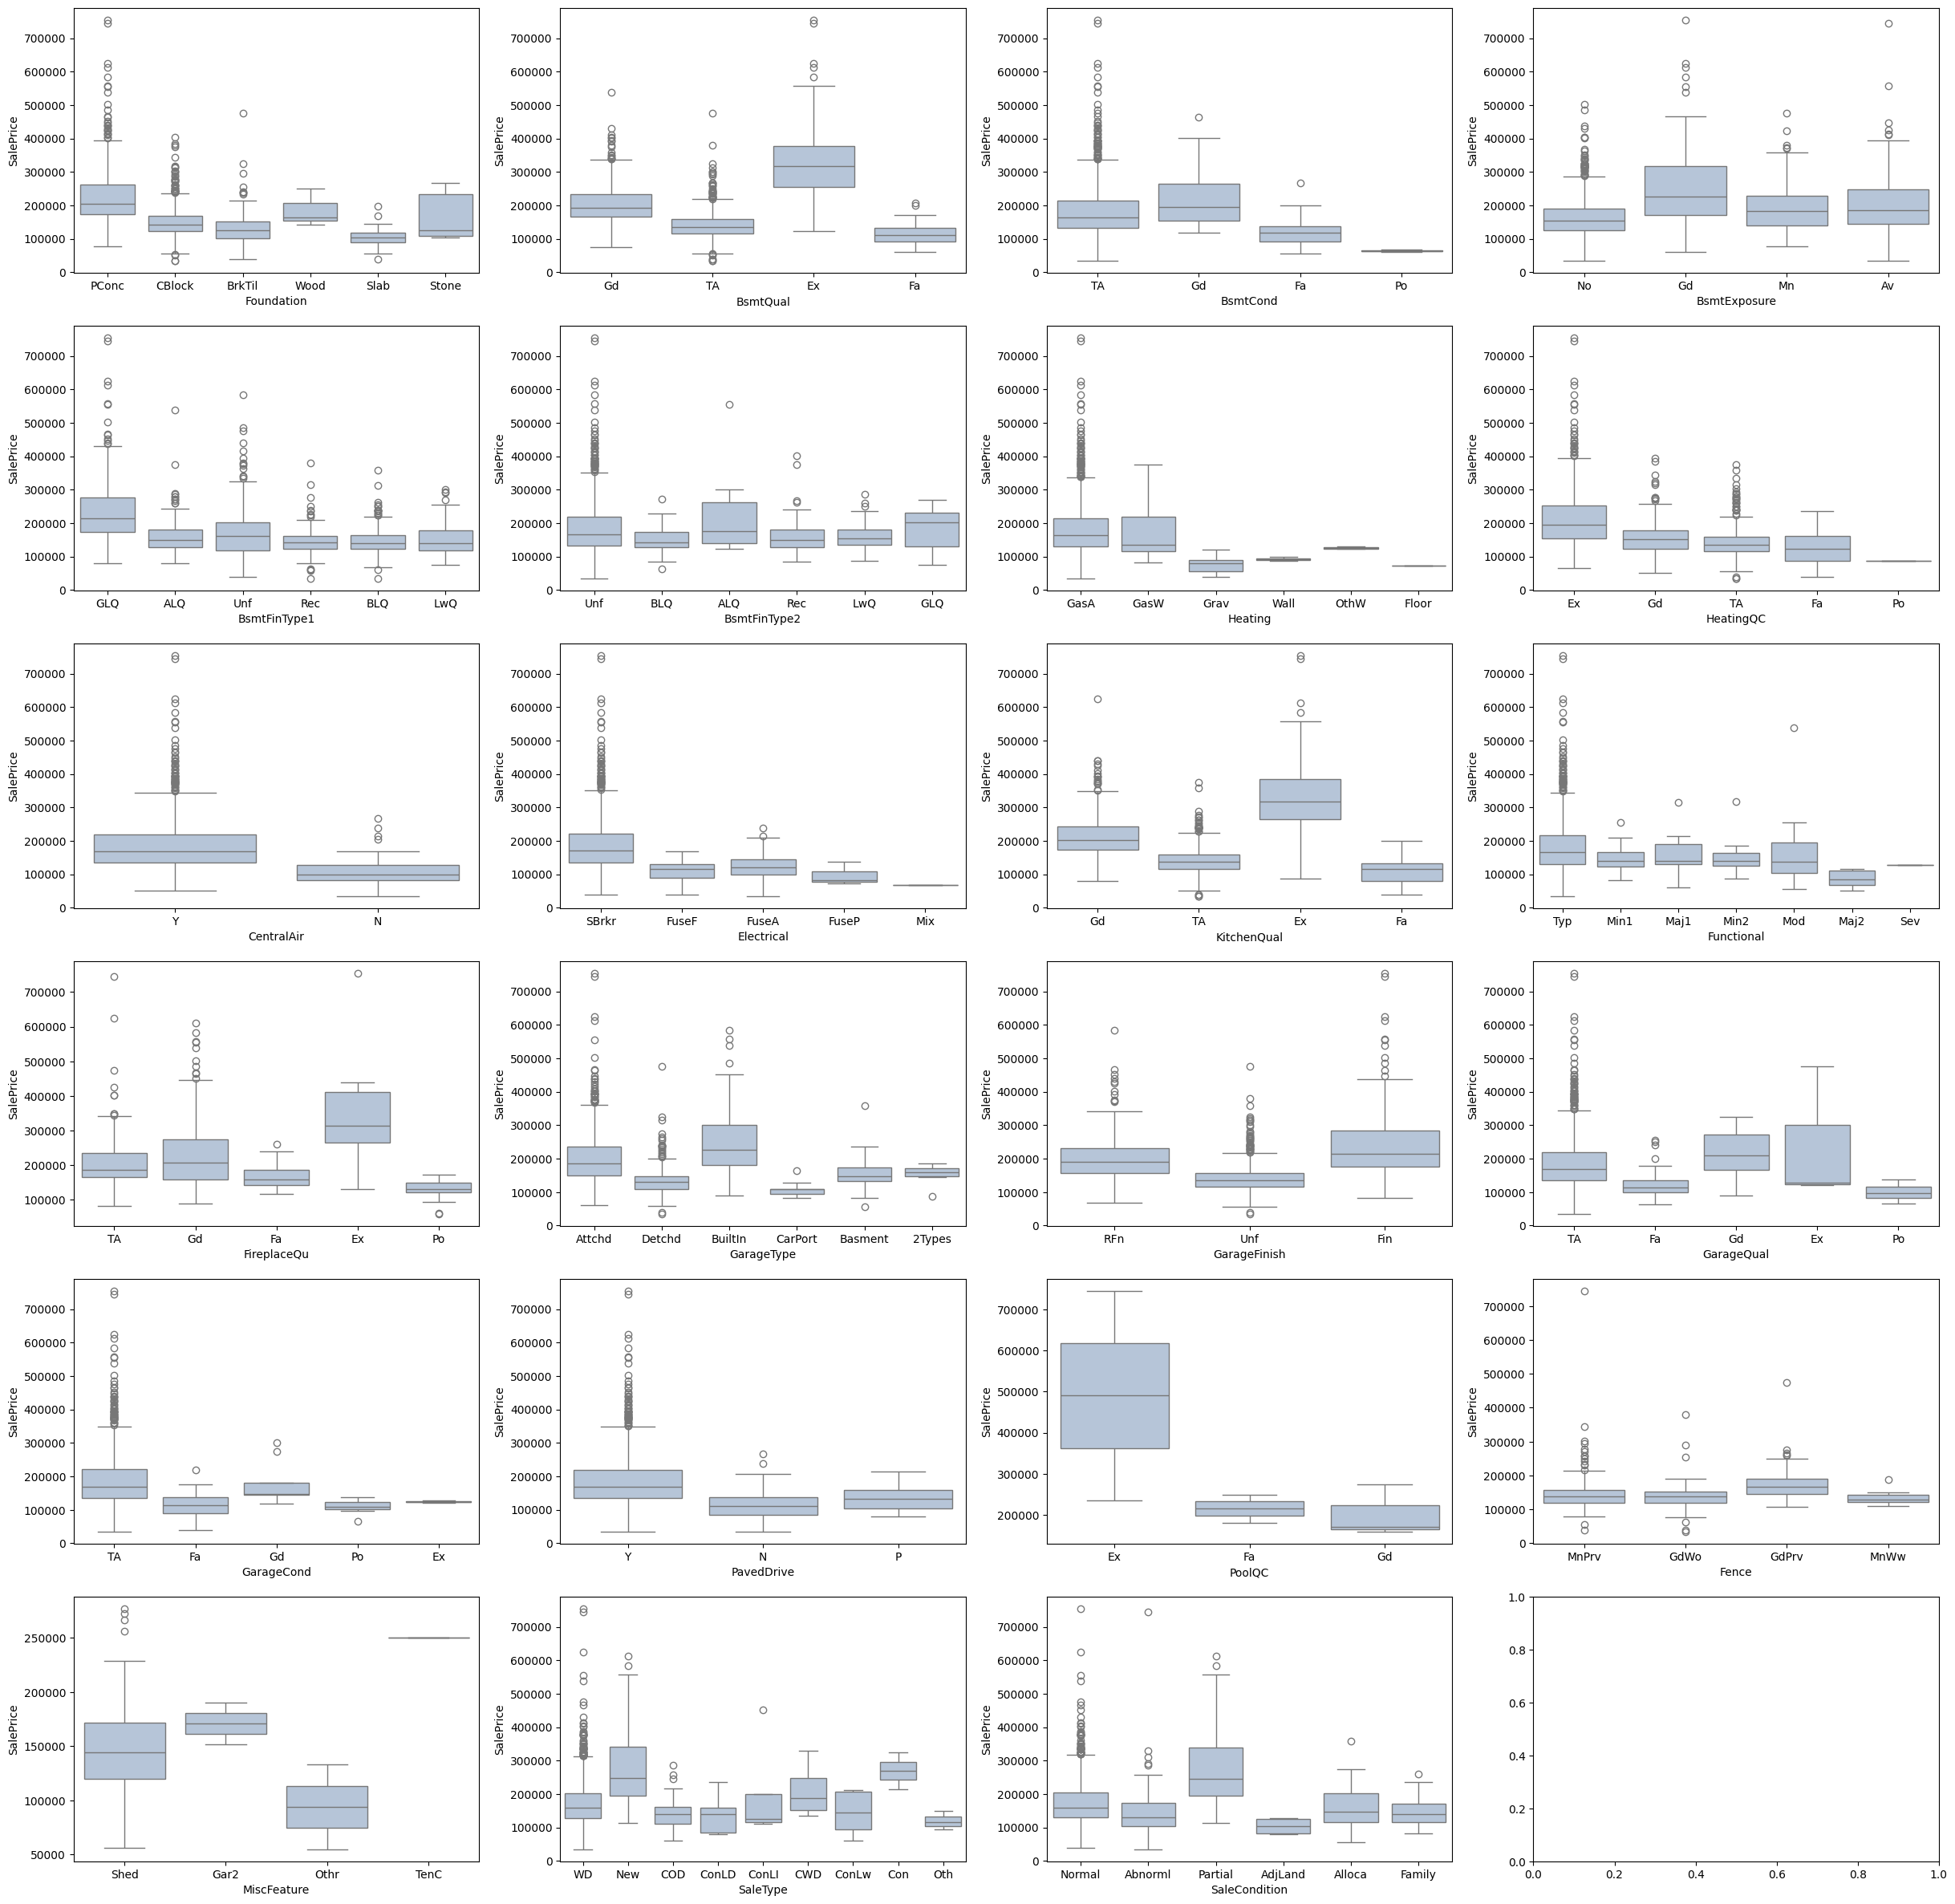

In [7]:
## boxplot between SalePrice and other categorical features
fig, axes = plt.subplots(6,4,figsize=(30,30))

k = 0
for i in range(6):
    for j in range(4):
        if k >= len(catColumns):
            break
        sns.boxplot(data=dataframe,x=catColumns[k],y='SalePrice',ax=axes[i,j],color='lightsteelblue')
        k += 1